# Laboratorio 1

## Inteligencia de Negocios

## Integrantes:
    Juan Diego Cardona 201819447
    Nicolas Ortega 201814515
    Camila Teran 201822000

# Análisis Exploratorio y Perfilamiento de Datos

### 1. Importación de librerías 



In [3]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib as mplt
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier

#Regresion Logistica
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

### 2. Carga de los datos

In [4]:
# Se cargan los datos. 
datos=pd.read_csv('datos.csv', sep=';', encoding = 'utf-8')
datos.head()

,HairColor,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6.0,148.0,New York,72.0,35.0,0.0,336,627.0,50,1.0
1,Black,1.0,85.0,New York,66.0,29.0,0.0,266,351.0,31,0.0
2,Red,8.0,183.0,New York,64.0,0.0,0.0,233,672.0,32,1.0
3,Black,1.0,89.0,New York,66.0,23.0,94.0,281,167.0,21,0.0
4,Black,0.0,137.0,New York,40.0,35.0,168.0,431,2288.0,33,1.0


In [5]:
datos.shape

(768, 11)

In [6]:
datos.dtypes

HairColor                    object
Pregnancies                 float64
Glucose                     float64
City                         object
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                           int64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                     float64
dtype: object

In [7]:
# Y hacer una descripción de los datos
datos.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,768.000000,767.000000,768.000000,767.000000
mean,3.839635,120.921773,69.096480,20.563233,79.903520,289.796875,432.395046,38.011719,0.349413
std,3.368429,31.984561,19.366833,15.945349,115.283105,116.757554,336.144934,117.825600,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,251.750000,205.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,337.000000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,359.000000,592.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,3256.000000,1.000000


In [8]:
# Se observa que hay ausencias:
datos.isnull().sum()

HairColor                   0
Pregnancies                 1
Glucose                     1
City                        1
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     1
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

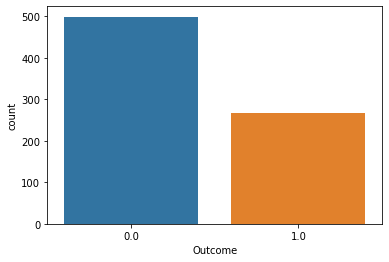

In [9]:
sns.countplot(x='Outcome',data=datos)

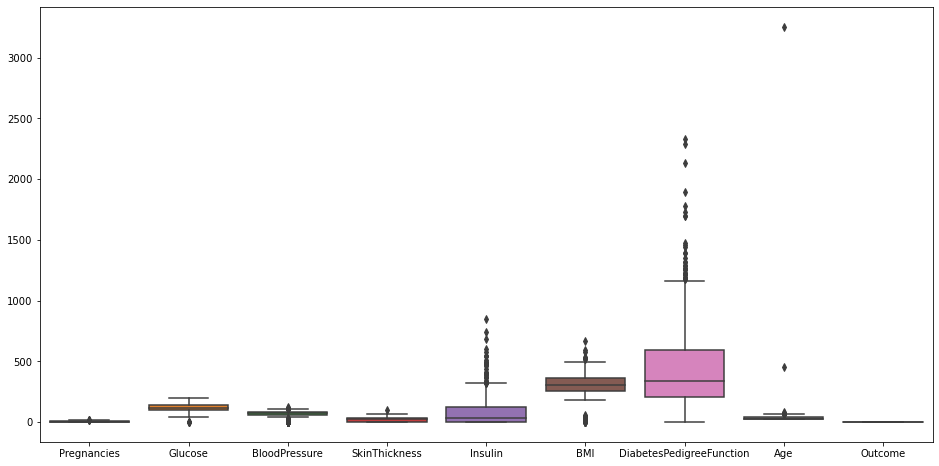

In [10]:
#Diagrama de cajas
fig=plt.figure(figsize=(16,8))
ax = sns.boxplot(data=datos)

# Limpieza y preparación de datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados el tratamiento de ausencias y registros duplicados.

In [11]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datoslimpios = datos
datoslimpios


,HairColor,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6.0,148.0,New York,72.0,35.0,0.0,336,627.0,50,1.0
1,Black,1.0,85.0,New York,66.0,29.0,0.0,266,351.0,31,0.0
2,Red,8.0,183.0,New York,64.0,0.0,0.0,233,672.0,32,1.0
3,Black,1.0,89.0,New York,66.0,23.0,94.0,281,167.0,21,0.0
4,Black,0.0,137.0,New York,40.0,35.0,168.0,431,2288.0,33,1.0
...,...,...,...,...,...,...,...,...,...,...,...
763,Black,10.0,101.0,New York,76.0,48.0,180.0,329,171.0,63,0.0
764,Black,2.0,122.0,New York,70.0,27.0,0.0,368,34.0,27,0.0
765,Red,5.0,121.0,New York,72.0,23.0,112.0,262,245.0,30,0.0
766,Black,1.0,126.0,New York,60.0,0.0,0.0,301,349.0,47,1.0


In [12]:
# Eliminación registros con ausencias
#¿Porqué realizar este paso?
datoslimpios = datoslimpios.dropna()

In [13]:
# Cantidad de datos y número de variables
datoslimpios.shape

(767, 11)

In [14]:
#Restricciones

#Edad menor a 100 y mayor a 21
datoslimpios = datoslimpios[datoslimpios.Age < 100]
datoslimpios = datoslimpios[datoslimpios.Age >= 21]

#BMI no puede ser 0
datoslimpios = datoslimpios[datoslimpios.BMI >0]

#Glucosa no puede ser 0
datoslimpios = datoslimpios[datoslimpios.Glucose >0]

#BloodPressure no puede ser 0
datoslimpios = datoslimpios[datoslimpios.BloodPressure >0]

#SkinThickness no puede ser 0
datoslimpios = datoslimpios[datoslimpios.SkinThickness> 0]

#Quitar color de pelo y ciudad
datoslimpios = datoslimpios.drop(['HairColor'], axis=1)
datoslimpios = datoslimpios.drop(['City'], axis=1)

datoslimpios

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,336,627.0,50,1.0
1,1.0,85.0,66.0,29.0,0.0,266,351.0,31,0.0
3,1.0,89.0,66.0,23.0,94.0,281,167.0,21,0.0
4,0.0,137.0,40.0,35.0,168.0,431,2288.0,33,1.0
6,3.0,78.0,50.0,32.0,88.0,31,248.0,26,1.0
...,...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,0.0,44,403.0,43,1.0
763,10.0,101.0,76.0,48.0,180.0,329,171.0,63,0.0
764,2.0,122.0,70.0,27.0,0.0,368,34.0,27,0.0
765,5.0,121.0,72.0,23.0,112.0,262,245.0,30,0.0


# Clasificadores:

## K-Nearest-neighbours

### Construcción del modelo 

In [15]:
# Se selecciona la variable objetivo, en este caso "Outcome".
Y = datoslimpios['Outcome']
# Del conjunto de datos se elimina la variable "Outcome"
X = datoslimpios.drop(['Outcome'], axis=1)

In [16]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### 4.1. Primer intento con KNN

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(X_train, Y_train)

In [18]:
y_pred = neigh.predict(X_test)

In [19]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[59,  5],
       [27, 16]])

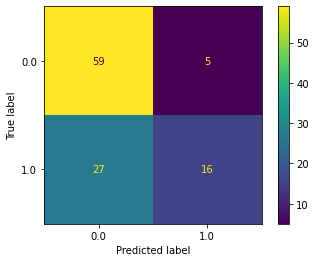

In [20]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()

In [21]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79        64
         1.0       0.76      0.37      0.50        43

    accuracy                           0.70       107
   macro avg       0.72      0.65      0.64       107
weighted avg       0.72      0.70      0.67       107



#### KNN uso mejorado


In [22]:
KNNmejorado = datoslimpios.copy()
KNNmejorado
normalizado=(KNNmejorado-KNNmejorado.min())/(KNNmejorado.max()-KNNmejorado.min())

print(normalizado)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.643357       0.558140       0.304348  0.000000  0.485407   
1       0.058824  0.202797       0.488372       0.239130  0.000000  0.377880   
3       0.058824  0.230769       0.488372       0.173913  0.111111  0.400922   
4       0.000000  0.566434       0.186047       0.304348  0.198582  0.631336   
6       0.176471  0.153846       0.302326       0.271739  0.104019  0.016897   
..           ...       ...            ...            ...       ...       ...   
761     0.529412  0.797203       0.581395       0.260870  0.000000  0.036866   
763     0.588235  0.314685       0.604651       0.445652  0.212766  0.474654   
764     0.117647  0.461538       0.534884       0.217391  0.000000  0.534562   
765     0.294118  0.454545       0.558140       0.173913  0.132388  0.371736   
767     0.058824  0.258741       0.534884       0.260870  0.000000  0.436252   

     DiabetesPedigreeFunction       Age

In [23]:
normalizado.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,0.207156,0.455085,0.552556,0.241157,0.135983,0.430703,0.198619,0.177244,0.333333
std,0.194903,0.216849,0.143227,0.114493,0.145529,0.170487,0.148477,0.179364,0.471849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.300699,0.465116,0.163043,0.000000,0.370968,0.100086,0.033333,0.000000
50%,0.117647,0.412587,0.558140,0.239130,0.108747,0.465438,0.164948,0.116667,0.000000
75%,0.294118,0.597902,0.651163,0.315217,0.195626,0.531490,0.273196,0.283333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Se selecciona la variable objetivo, en este caso "Outcome".
Y = normalizado['Outcome']
# Del conjunto de datos se elimina la variable "Outcome"
X = normalizado.drop(['Outcome'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
neigh = KNeighborsClassifier(n_neighbors=3) # arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
neigh = neigh.fit(X_train, Y_train) # arbol = arbol.fit(X_train,Y_train)
y_pred = neigh.predict(X_test) # y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.68
Recall: 0.3953488372093023
Precisión: 0.68
Puntuación F1: 0.5


In [25]:
#Estadisticas con el conjunto de entrenamiento
y_pred = neigh.predict(X_train) # y_pred = arbol.predict(X_train)
print('Exactitud: %.2f' % accuracy_score(Y_train, y_pred))
print("Recall: {}".format(recall_score(Y_train,y_pred)))
print("Precisión: {}".format(precision_score(Y_train,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_train,y_pred)))

Exactitud: 0.86
Recall: 0.6940298507462687
Precisión: 0.8378378378378378
Puntuación F1: 0.7591836734693876


### 5. Búsqueda de hiperparámetros

In [26]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Lista de Hiperparámetros a afinar
n_neighbors = list(range(1,10))
n_odd_neighbors = list(filter(lambda x: (x % 2 != 0), n_neighbors))
p=[1,2] #Función de distancia 1: manhattan, 2: euclidean, otro valor: minkowski

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
mejor_modelo_knn = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
mejor_modelo_knn.fit(X_train, Y_train)

#Print The value of best Hyperparameters
print('Best p:', mejor_modelo_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', mejor_modelo_knn.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 8


In [27]:
# Obtener el mejor modelo.
neigh_final = mejor_modelo_knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = neigh_final.predict(X_train)
y_pred_test = neigh_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.81
Exactitud sobre test: 0.70


In [28]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.68      0.95      0.79        64
         1.0       0.82      0.33      0.47        43

    accuracy                           0.70       107
   macro avg       0.75      0.64      0.63       107
weighted avg       0.74      0.70      0.66       107



## Arboles de Decisión

### Construcción del modelo

In [30]:
# Se selecciona la variable objetivo, en este caso "Popularity_label".
Y = datoslimpios['Outcome']
# Del conjunto de datos se elimina la variable "Popularity_label"
X = datoslimpios.drop(['Outcome'], axis=1)

In [31]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.73
Recall: 0.4883720930232558
Precisión: 0.75
Puntuación F1: 0.5915492957746479


### Búsqueda de hiperparámetros

In [33]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [34]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [35]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [36]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print("Recall: {}".format(recall_score(Y_train,y_pred_train)))
print("Precisión: {}".format(precision_score(Y_train, y_pred_train)))
print("Puntuación F1: {}".format(f1_score(Y_train, y_pred_train)))

Exactitud sobre entrenamiento: 0.86
Recall: 0.7014925373134329
Precisión: 0.8173913043478261
Puntuación F1: 0.7550200803212851


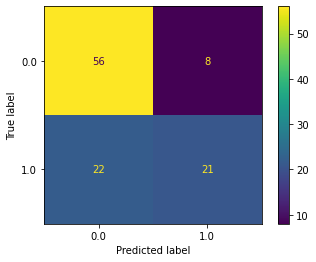

In [43]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol_final, X_train, Y_train)  
plt.show()

### Interpretación del modelo

In [37]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable
# asociada.
importancia = arbol_final.feature_importances_
importancia

array([0.02740255, 0.44653644, 0.03286773, 0.01407535, 0.08981438,
       0.06106254, 0.13251154, 0.19572947])

In [38]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Glucose,0.446536
1,Age,0.195729
2,DiabetesPedigreeFunction,0.132512
3,Insulin,0.089814
4,BMI,0.061063
5,BloodPressure,0.032868
6,Pregnancies,0.027403
7,SkinThickness,0.014075


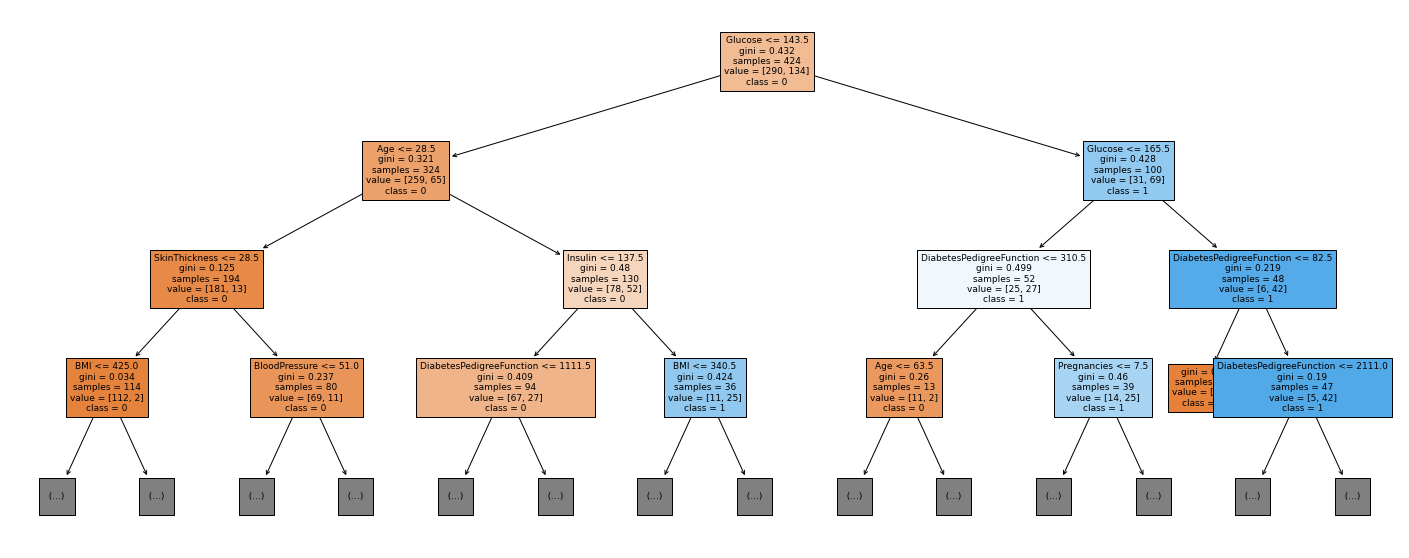

In [39]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol_final, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

## Clasificador de Libre Elección: Regresión Logística

### Construcción del modelo

In [44]:
modelname="Regresion Logistica"

In [45]:
x = datoslimpios.drop('Outcome',axis = 1)
y = datoslimpios.Outcome

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

### Busqueda de Hiperparámetros

In [47]:
lr = LogisticRegression(solver='lbfgs',max_iter=1000)

In [48]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred=lr.predict(x_test)

In [50]:
# Información del modelo
# ==============================================================================
print("Intercept:", lr.intercept_)
print("Coeficiente:", list(zip(x.columns, lr.coef_.flatten(), )))
print("Accuracy:", lr.score(x, y))

Intercept: [-8.35202895]
Coeficiente: [('Pregnancies', 0.0917974261313487), ('Glucose', 0.03872156718053289), ('BloodPressure', -0.01072564647035161), ('SkinThickness', 0.041945963713283387), ('Insulin', -0.0011031177126530143), ('BMI', 0.001629416843222045), ('DiabetesPedigreeFunction', 0.0015176320018447478), ('Age', 0.02643433001133034)]
Accuracy: 0.7871939736346516


In [44]:
# Mostrar reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84        87
         1.0       0.72      0.57      0.63        46

    accuracy                           0.77       133
   macro avg       0.76      0.73      0.74       133
weighted avg       0.77      0.77      0.77       133



In [51]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = lr.predict_proba( x_test)
predicciones = pd.DataFrame(predicciones, columns = lr.classes_)
predicciones.head(8)

,0.0,1.0
0,0.833012,0.166988
1,0.473739,0.526261
2,0.955230,0.044770
3,0.842753,0.157247
4,0.587482,0.412518
5,0.822638,0.177362
6,0.907326,0.092674
7,0.499198,0.500802


In [52]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
x_train = sm.add_constant(x_train, prepend=True)
lr = sm.Logit(endog=y_train, exog=x_train,)
lr = lr.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.442070
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  398
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            8
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                  0.3023
Time:                        19:36:55   Log-Likelihood:                -175.94
converged:                       True   LL-Null:                       -252.16
Covariance Type:            nonrobust   LLR p-value:                 6.084e-29
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.3515      1.040     -8.030      0.000     -10.390

In [53]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = lr.conf_int(alpha=0.05)
intervalos_ci = pd.DataFrame(intervalos_ci)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci


,2.5%,97.5%
const,-10.390024,-6.313075
Pregnancies,-0.006428,0.190482
Glucose,0.028003,0.049441
BloodPressure,-0.033633,0.012177
SkinThickness,0.012705,0.071200
Insulin,-0.003383,0.001176
BMI,-0.001123,0.004381
DiabetesPedigreeFunction,0.000721,0.002314
Age,-0.004824,0.057614
